In [1]:
# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar import smooth_contours
from lunar.plot_glare_contours import plot_glare_contours




In [2]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '25Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100 #used to decide if lights were on
threads = 2  


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


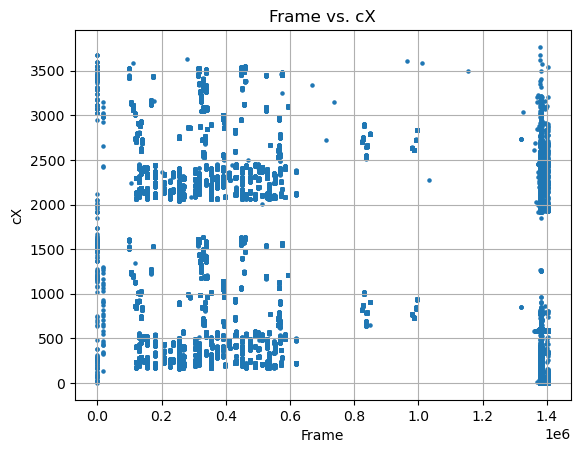

In [3]:
# Plot the contours data
output_file = 'contours_' + output_suffix
plot_contours(output_file)

## Glare is rather slow

In [4]:
# Identify glare in contour file
process_large_file(
    input_file='contours_' + output_suffix,
    output_file='glare_' + output_suffix,
    min_cluster_size=6000,
    eps=0.1,
    min_samples=50,
    chunksize=100000
)

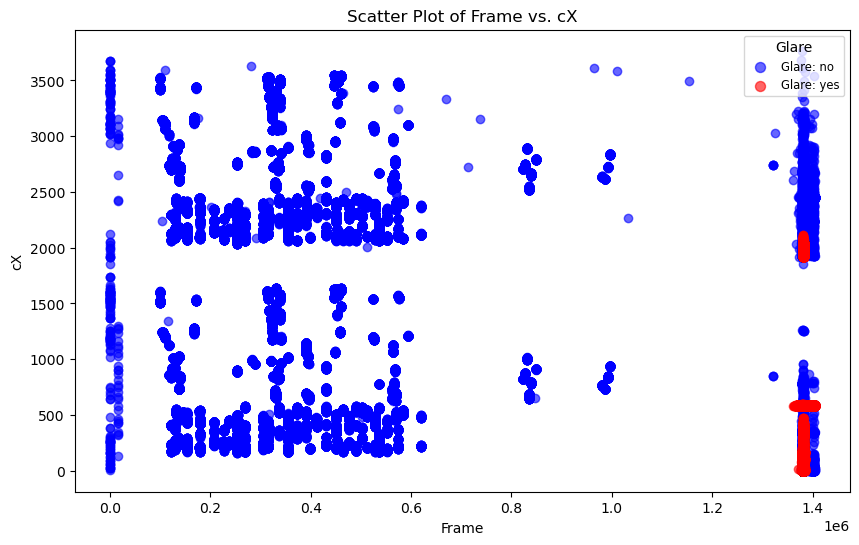

In [5]:
# Plot the glare-processed results
plot_glare_contours('glare_' + output_suffix, color_by_cluster=False)  # Change last to True to color by cluster

In [6]:
# Analyze the contours to label tanks
tank_boundaries = [164, 627, 1158, 1674, 2040, 2493, 3046, 3571]
analyze_contours('glare_' + output_suffix, tank_boundaries)

Removed 78639 rows labeled as glare.
Analysis complete. Results saved to analyzed_glare_25Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
0,15,1414.0,348.0,29.0,201.0,203.0,201.404762,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank3,256.0
1,15,748.0,352.0,15.0,201.0,204.0,202.083333,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,121.0
2,15,1644.0,347.0,18.5,201.0,221.0,206.312500,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank3,486.0
3,15,197.0,358.0,55.5,201.0,217.0,206.119048,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank1,33.0
4,15,286.0,358.0,120.0,200.0,208.0,202.576159,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank1,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195387,1403957,2453.0,617.0,43.5,201.0,228.0,212.500000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,413.0
195389,1403958,2453.0,624.0,45.5,201.0,220.0,210.015873,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,413.0
195391,1403959,2451.0,626.0,27.0,201.0,221.0,211.250000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,411.0
195396,1403960,2449.0,611.0,62.0,201.0,221.0,208.314607,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,409.0


In [7]:
match_cameras(
    'analyzed_glare_' + output_suffix,  # Input file
    'matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to matched_25Jul2024.tsv


Plot saved to smoothed_output.png


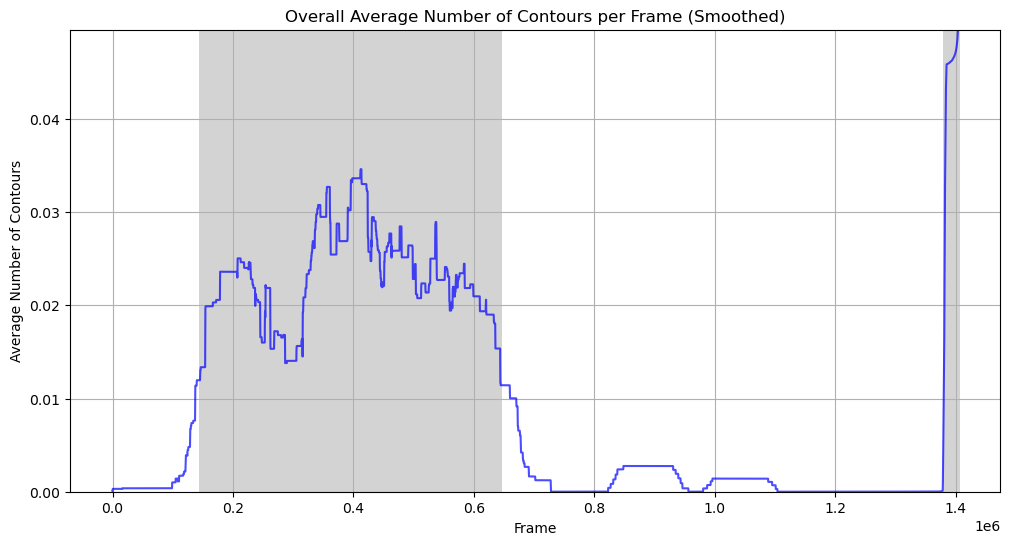

In [8]:
smooth_contours(
    input_file='matched_' + output_suffix,
    output_file='smoothed_output.png',
    window=108000,
    pad=True  #Pads beginning with zeros to not get edge artifact
)